In [16]:
import tensorflow  as tf

In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()
len(X_train)

11493376/11490434 [==============================] - 7s 1us/step


60000

In [4]:
X_train[0].shape

(28, 28)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

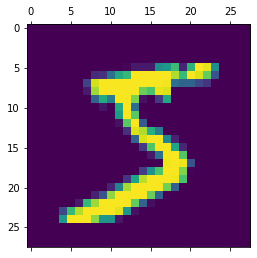

In [6]:
plt.matshow(X_train[0])

In [7]:
X_train = X_train / 255
X_test = X_test / 255

In [8]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [9]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4923 - accuracy: 0.8766
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3064 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2855 - accuracy: 0.9214
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2743 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2678 - accuracy: 0.9263


In [10]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2698 - accuracy: 0.9251


[0.2697734832763672, 0.9251000285148621]

In [11]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([1.9821886e-05, 8.1477533e-11, 2.5300600e-05, 1.6627699e-02,
       1.3559810e-06, 8.0160520e-05, 1.3030612e-09, 8.0316937e-01,
       6.5427790e-05, 8.2349777e-04], dtype=float32)

In [12]:
np.argmax(y_predicted[0])

7

In [13]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [14]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [17]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    1,    2,    0,    3,    3,    2,    1,    0],
       [   0, 1108,    4,    2,    0,    1,    4,    2,   14,    0],
       [   8,    8,  911,   24,    9,    4,   12,   11,   42,    3],
       [   3,    0,   14,  932,    0,   20,    2,   12,   20,    7],
       [   2,    1,    3,    1,  922,    0,    9,    4,   10,   30],
       [  10,    1,    2,   38,   11,  775,   12,    7,   30,    6],
       [  15,    3,    6,    1,    9,   11,  909,    2,    2,    0],
       [   1,    5,   18,   10,    7,    0,    0,  960,    3,   24],
       [   9,    5,    6,   28,    9,   24,    9,   13,  866,    5],
       [  11,    6,    1,   13,   33,    5,    0,   30,   10,  900]])>

Text(69.0, 0.5, 'Truth')

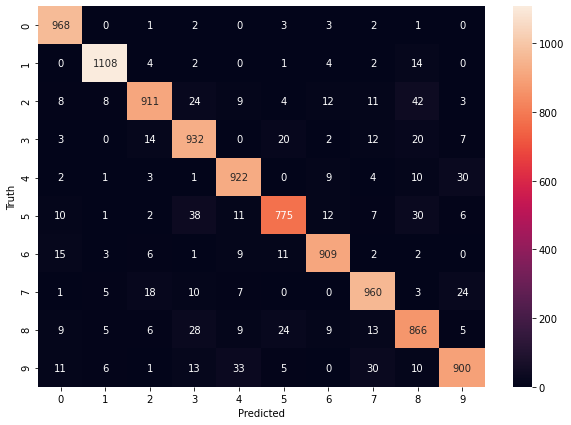

In [18]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')